# UCI ML Drug Review

In [1]:
#Dataset link:-https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("drugsComTrain_raw.csv")
df_test = pd.read_csv("drugsComTest_raw.csv")

print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

df_train.head(10)

The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


**These are additional explanations for variables.**

 * **drugName (categorical): name of drug**
 * **condition (categorical): name of condition**
 * **review (text): patient review**
 * **rating (numerical): 10 star patient rating**
 * **date (date): date of review entry**
 * **usefulCount (numerical): number of users who found review useful**

In [4]:
df_train.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [5]:
# Merging the test and train data 
merge = [df_train, df_test]
df_data = pd.concat(merge)

print (df_data.shape)

pd.set_option('display.max_colwidth', None)

df_data.head()

(215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9,27-Nov-16,37


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [7]:
df_data.describe(include='all')

,uniqueID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,1-Mar-16,NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


In [8]:
print ("Null values in the dataset : ", df_data.isnull().sum(axis = 0))

Null values in the dataset :  uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


In [9]:
# Calculating what percentage of data is null
size = df_data.shape[0]

print ("Total Size of the dataset : ", size)

total_na = df_data.isnull().sum(axis = 0)['condition']
print ("Null values : ", total_na)

print ("PERCENTAGE : ", (total_na/size)*100)

Total Size of the dataset :  215063
Null values :  1194
PERCENTAGE :  0.5551861547546533


In [10]:
#check number of unique values in drugName
print(df_data['drugName'].nunique())

#check number of unique values in condition
print(df_data['condition'].nunique())

3671
916



**DrugName is closely related to condition, so we have analyzed them together. The unique values of the two variables 
are 3671 and 916, respectively, and there are about 4 drugs for each condition.So there are conditions which has multiple drugs.**

# Exploratory Data Analysis (EDA)

### Check the top 20 conditions

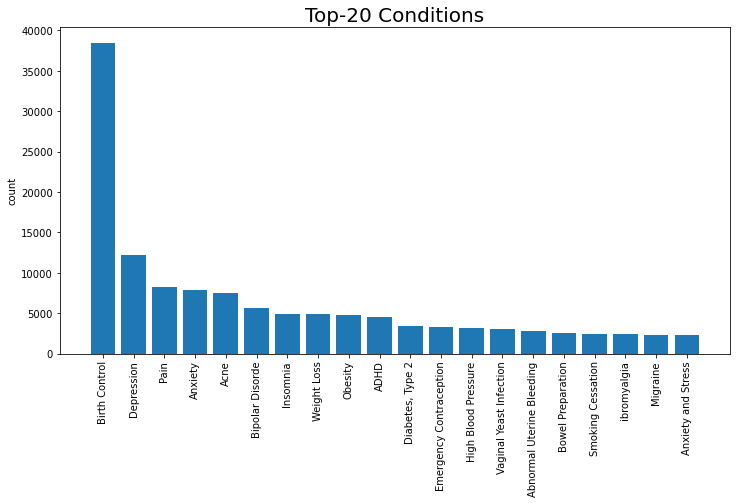

In [11]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(12,6))
conditions = df_data['condition'].value_counts(ascending = False).head(20)

plt.bar(conditions.index,conditions.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

**From above graph we can see that the :**

 * Birth control is twice as big as anyone, around 38,000.
 * Most of the conditions for top 20 conditions are between 5000 - 10000

### Plot the bottom 20 conditions

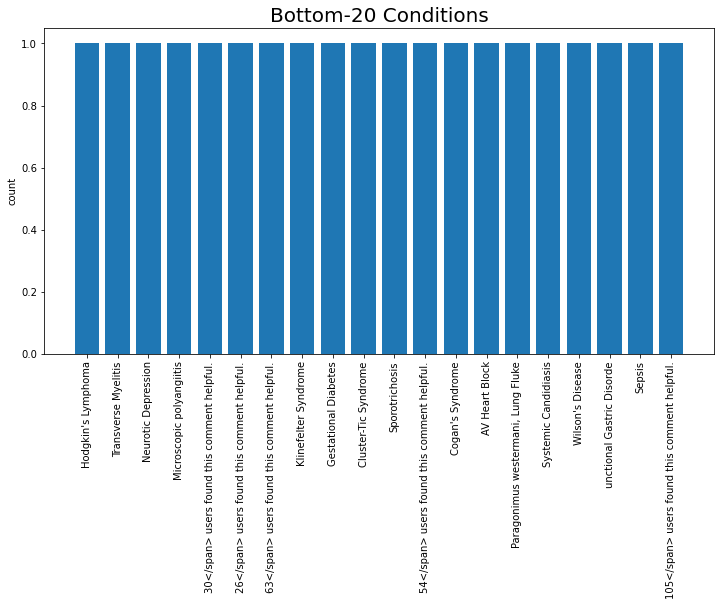

In [12]:
#plot a bargraph to check bottom 20 conditions
plt.figure(figsize=(12,6))
conditions_bottom = df_data['condition'].value_counts(ascending = False).tail(20)

plt.bar(conditions_bottom.index,conditions_bottom.values)
plt.title('Bottom-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

 * Bottom 20 conditions have just single counts in our dataset. They may be the rare conditions.
 * And if we look at our plot we see that there are conditions whose name are strange starting with "61 < /span > users found this    comment helpful",these are the noise present in our data. We will deal with these noise later.

### Check top 20 drugName

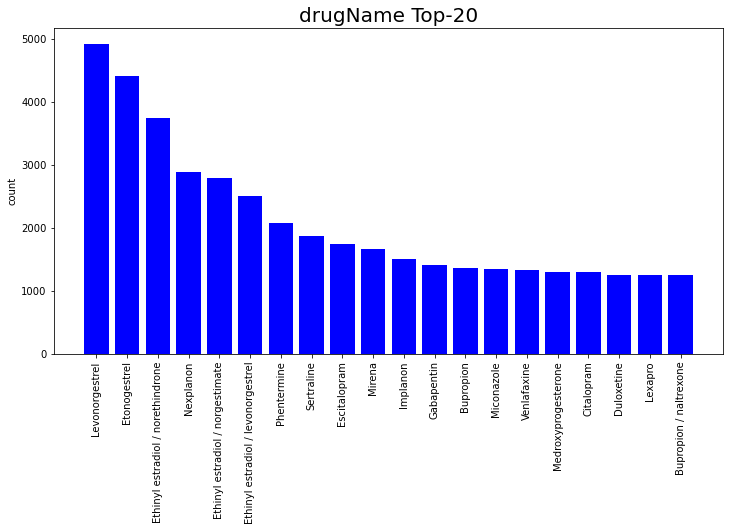

In [13]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_top = df_data['drugName'].value_counts(ascending = False).head(20)

plt.bar(drugName_top.index,drugName_top.values,color='blue')
plt.title('drugName Top-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

 * The top drugName is Levonorgestrel, is the drug with the highest number of 10/10 ratings
 * The top 3 drugName has count around 4000 and above.
 * Most of the drugName counts are around 1500 if we look at top 20

### Check bottom 20 drugName

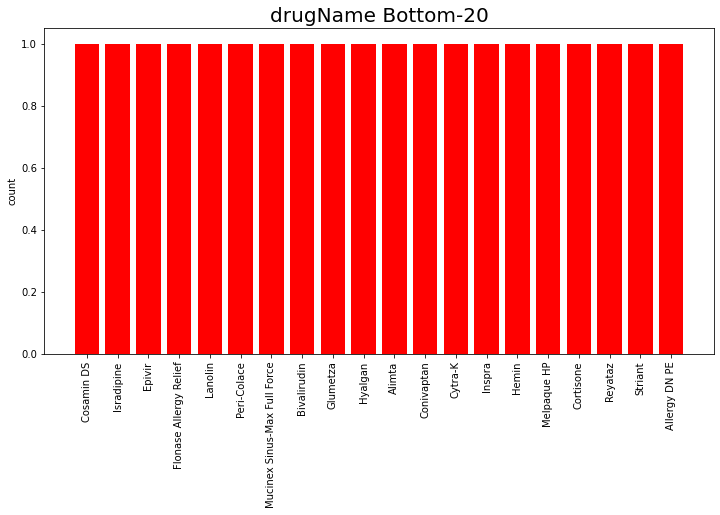

In [14]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_bottom = df_data['drugName'].value_counts(ascending = False).tail(20)

plt.bar(drugName_bottom.index,drugName_bottom.values,color='red')
plt.title('drugName Bottom-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

The bottom 20 drugName has count 1. These might be the drugs used of rare conditions or are new in market.

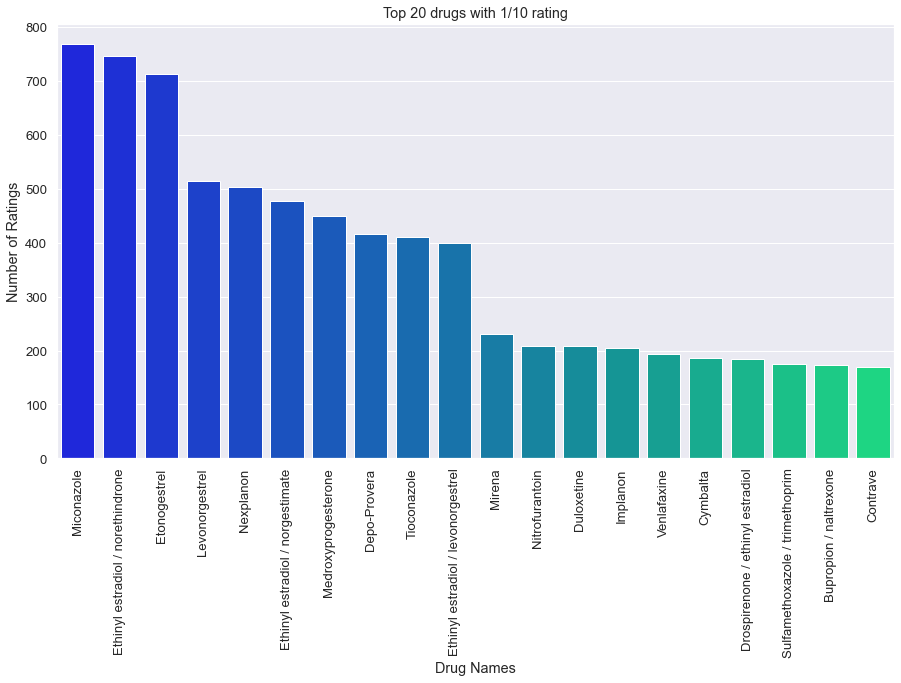

In [15]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

**The is a bar graph thatshows the top 20 drugs given in the data set with a rating of 1/10. 
'Miconazole' is the drug with the highest number of 1/10 ratings, about 767.**

Text(0.5, 0, 'Rating')

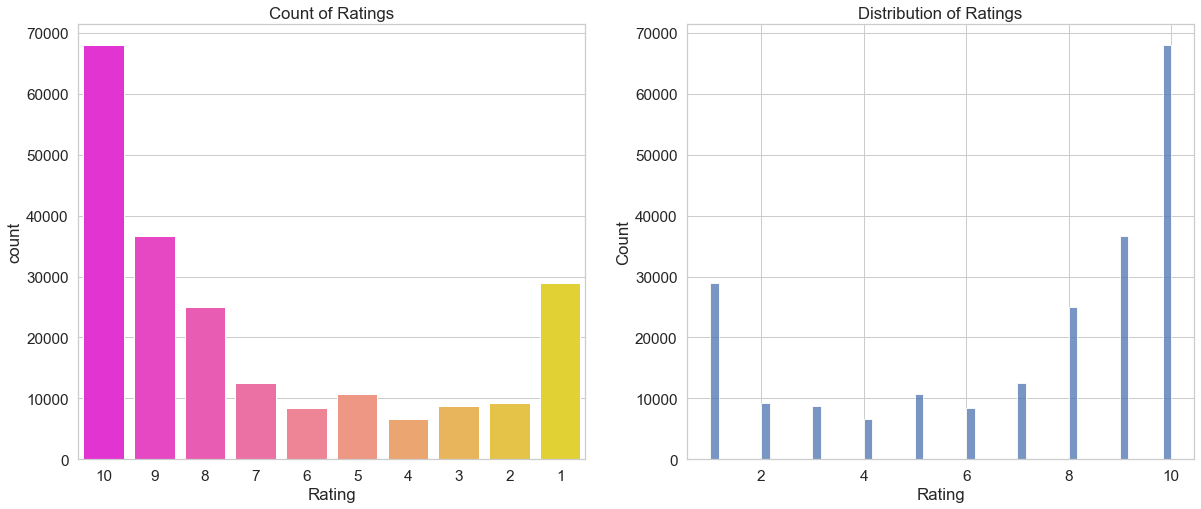

In [16]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df_data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.histplot(df_data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

 * **The shows a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set.**

Text(0, 0.5, 'Count')

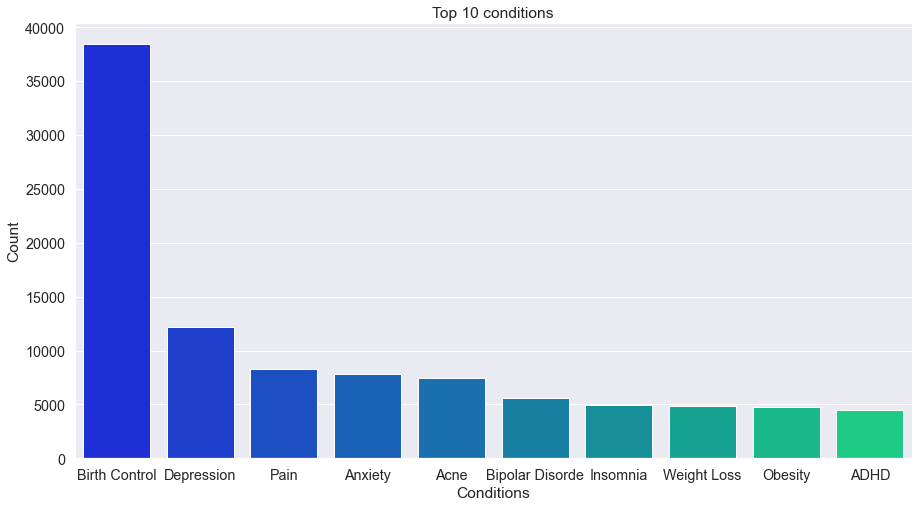

In [17]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(df_data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [15, 8]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count")

 * **The is a bar graph which exhibits the top 10 conditions the people are suffering from. In this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and pain.**

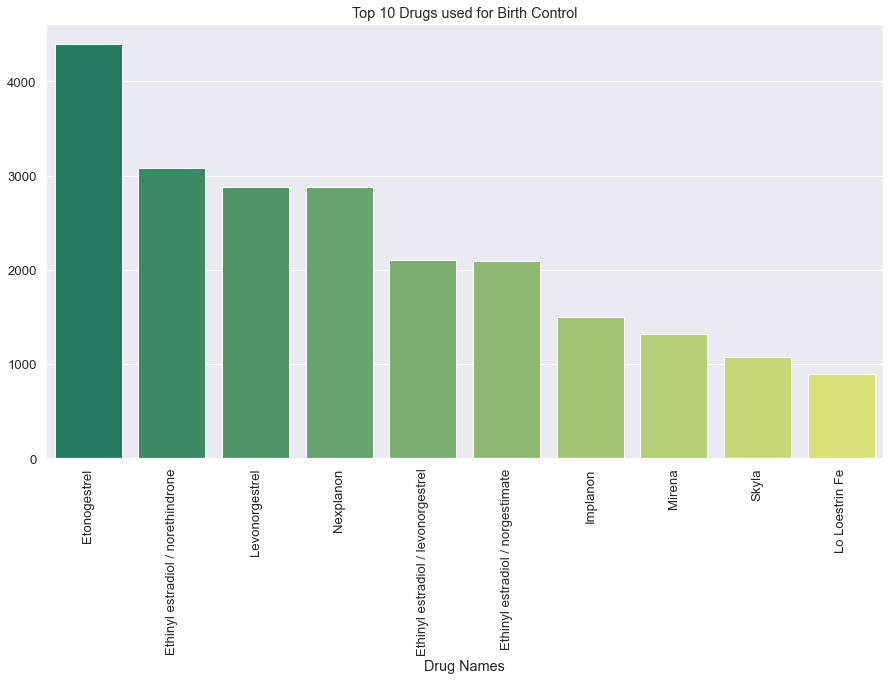

In [18]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df1 = df_data[df_data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

 * **The is a bar graph which shows the top 10 drug names for the people suffering from Birth Control. In this data set 'Etonogestrel' is the most used drug with big count.**

In [19]:
# let's make a new column review sentiment 

df_data.loc[(df_data['rating'] >= 5), 'Review_Sentiment'] = 1
df_data.loc[(df_data['rating'] < 5), 'Review_Sentiment'] = 0

df_data['Review_Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Review_Sentiment, dtype: int64

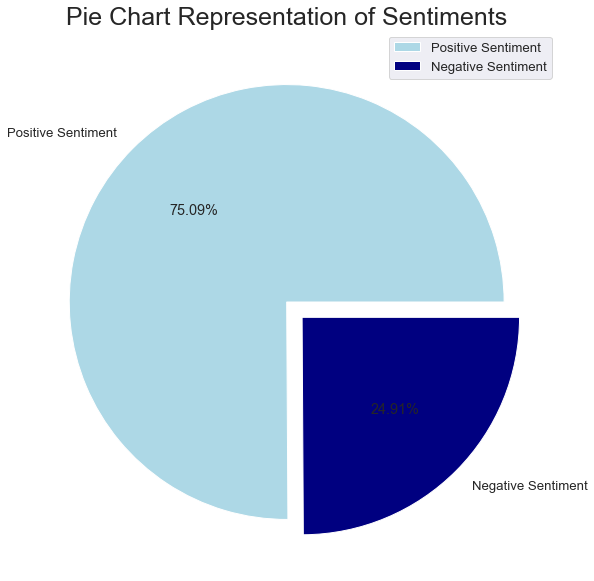

In [20]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

This pie chart represents the percentage of sentiment of the reviews

## VISUALIZATION OF REVIEWS BASED ON DATETIME

In [21]:
# converting the date into datetime format
df_data['date'] = pd.to_datetime(df_data['date'], errors = 'coerce')

# now extracting year from date
df_data['Year'] = df_data['date'].dt.year

# extracting the month from the date
df_data['month'] = df_data['date'].dt.month

# extracting the days from the date
df_data['day'] = df_data['date'].dt.day

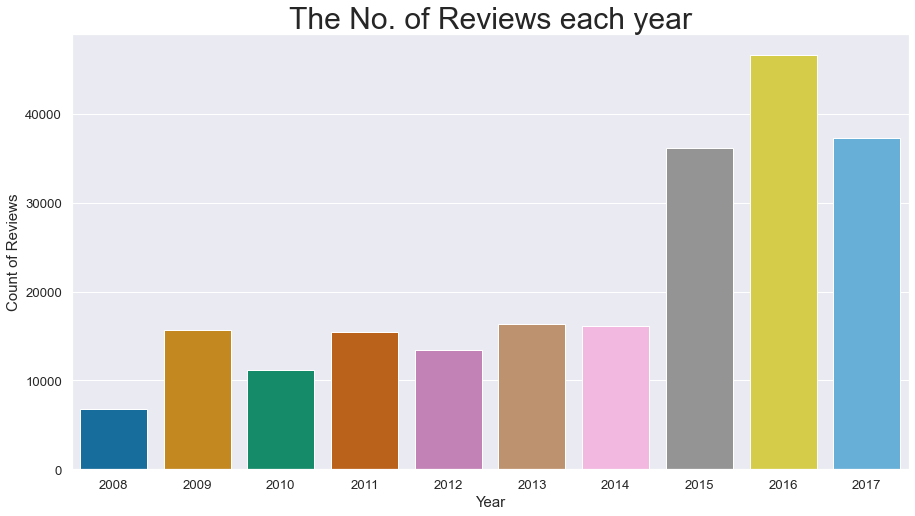

In [22]:
# Number of reviews in each year

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df_data['Year'], palette ='colorblind')
plt.title('The No. of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

 * Bar graph shows the number of reviews in the data set per year. It can be inferred that most ratings are given in 2016 and 2008 has the least number of reviews.

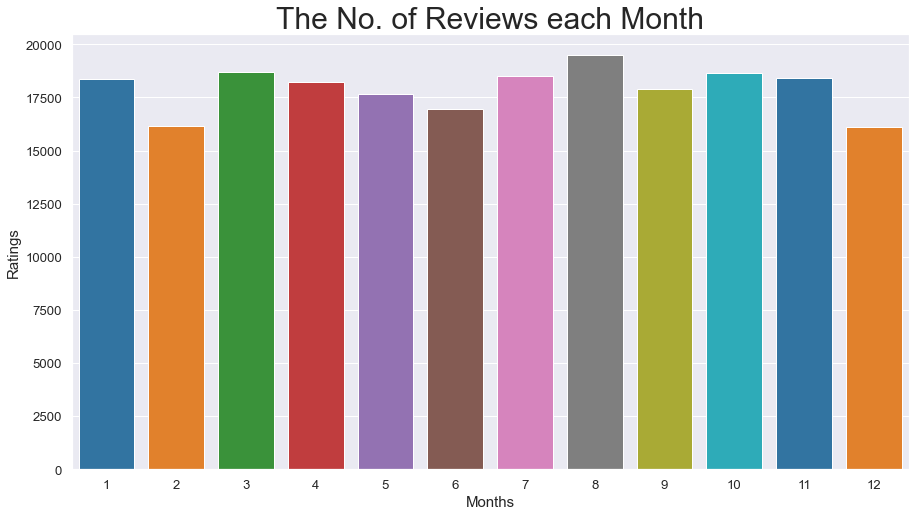

In [23]:
# Number of reviews in each months

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df_data['month'], palette ='tab10')
plt.title('The No. of Reviews each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

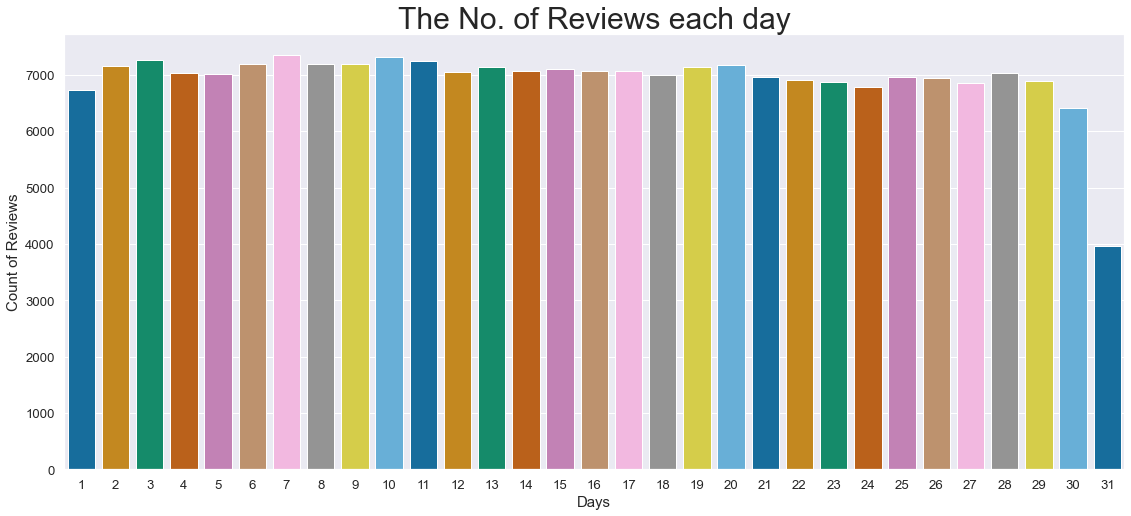

In [24]:
# looking at the no: of reviews in each day

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(df_data['day'], palette ='colorblind')
plt.title('The No. of Reviews each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

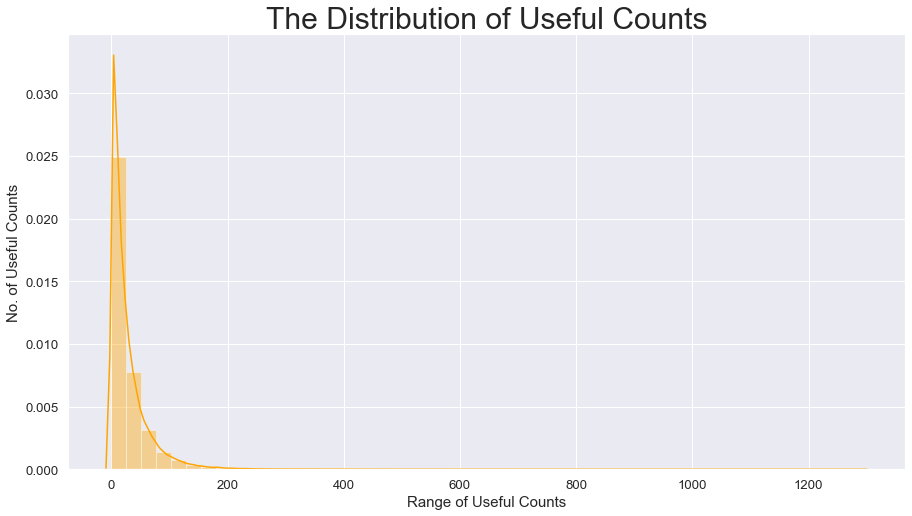

In [25]:
# Distribution of the useful count
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(df_data['usefulCount'].dropna(), color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

In [26]:
df_data["usefulCount"].describe()

count    215063.000000
mean         28.001004
std          36.346069
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

 * **If you look at the distribution of usefulCount, you can see that the difference between minimum and maximum is 1291, which is high. In addition, the deviation is huge, which is 36. The reason for this is that the more drugs people look for, the more people read the review no matter their contents are good or bad, which makes the usefulcount very high.**

## DATA PREPROCESSING / FEATURE ENGINEERING

In [27]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "",regex=True)
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ',regex=True)
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ',regex=True)
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','',regex=True)
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ',regex=True)
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ',regex=True)
    
    return dataframe

In [28]:
df_data['review_clean'] = review_clean(df_data['review'])

In [29]:
from textblob import TextBlob# I have used textblob module to give the sentiment polarity of the review. This polarity is given to both the cleaned and uncleaned review
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [30]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [31]:
pd.reset_option('display.max_colwidth')
df_data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,side effect take combin bystol 5 mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,use take anoth oral contracept 21 pill cycl ha...


In [32]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [33]:
df_data['sentiment'] = sentiment(df_data['review'])

In [34]:
df_data['sentiment_clean'] = sentiment(df_data['review_clean'])

In [35]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df_data['review_clean_ss'] = review_clean(df_data['review'])
df_data['sentiment_clean_ss'] = sentiment(df_data['review_clean_ss'])

In [36]:
df_data = df_data.dropna(how="any", axis=0)

In [37]:
#Word count in each review
df_data['count_word']=df_data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df_data['count_unique_word']=df_data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_data['count_letters']=df_data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df_data["count_punctuations"] = df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_data["count_words_upper"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_data["count_words_title"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_data["count_stopwords"] = df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df_data["mean_word_len"] = df_data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

 * **The new features engineered are 'count_word' which is the number of words in each review, 'count_unique_word' which is the number of the unique words in the reviews. 'count_letters' is the letter count, 'punctuation_count' is the punctuation count, 'count_words_upper' is the upper case word count,'count_words_title' is the title case word counts, 'count_stopwords' is the number of stop words in the review, and the 'mean_word_len' is the average length of the words in the review. The date is also divided into three columns which are day, month and year for separate features for training.**

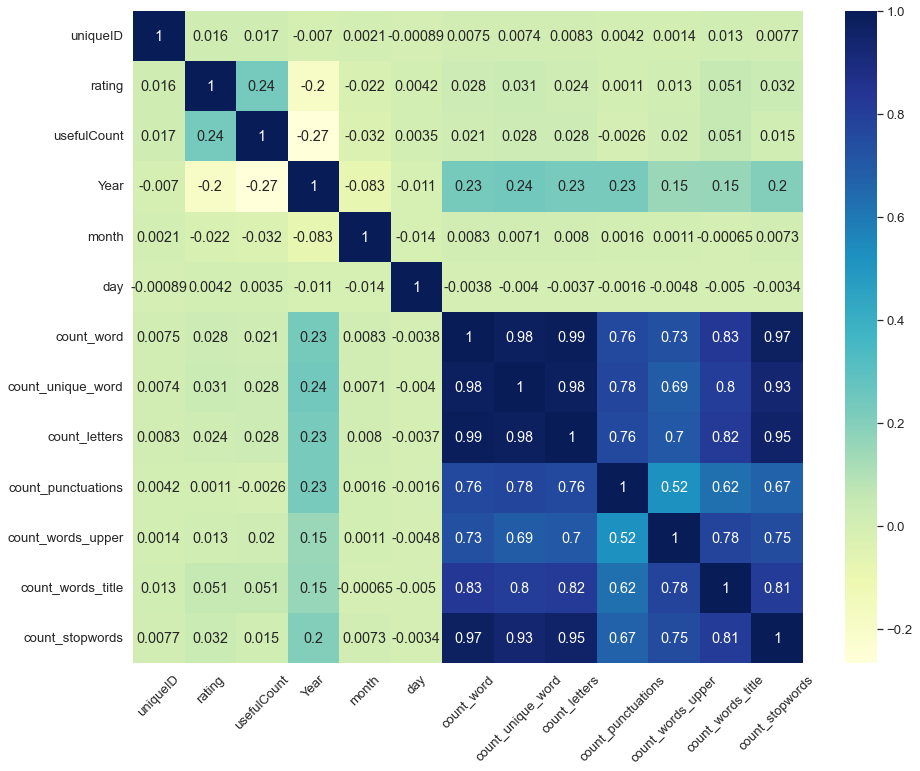

In [38]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [15,12]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);

 * Correlation Heatmap is plotted using seaborn which contains all the new features engineered and the old features.

## LABEL ENCODING

In [39]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df_data[feature] = label_encoder_feat[feature].fit_transform(df_data[feature])

 * **The Label Encoder is used to change the categorical values of Drug Names and the conditions in to numerical values for the machine learning modelling. There are 3,667 unique drugs in the dataset that's why One hot encoder is not used as it would generate 3,667 new features and it would be very computationally expensive.**

## Modelling

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [41]:
# Defining Features and splitting the data as train and test set

features = df_data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = df_data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708, 15)
The Test set size  (64161, 15)


 * **70% of the dataset is used for the training and the rest of the data i.e. 30% is used for the testing purpose. The shape of the training set is (149708, 15) and the shape of the test set is (64161, 15).**

In [42]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance

 * **LightGBM is a gradient boosting framework that uses treebased learning algorithms. It's designed to be distributed and efficient. It has many advantages like faster training speed and higher efficiency, lower memory usage, better accuracy and support of parallel and GPU learning, since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit.**

### LightGBM

In [43]:
# Training Model - I

clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions), '\n')

print (classification_report(y_test, predictions))

The Accuracy of the model is :  0.9014822088184411 

The confusion Matrix is 

[[11753  4321]
 [ 2000 46087]] 

              precision    recall  f1-score   support

         0.0       0.85      0.73      0.79     16074
         1.0       0.91      0.96      0.94     48087

    accuracy                           0.90     64161
   macro avg       0.88      0.84      0.86     64161
weighted avg       0.90      0.90      0.90     64161



**The Confusion Matrix for the LGBM model is given above, it can be seen that the accuracy of the LGBM is 0.9014 (90%).**

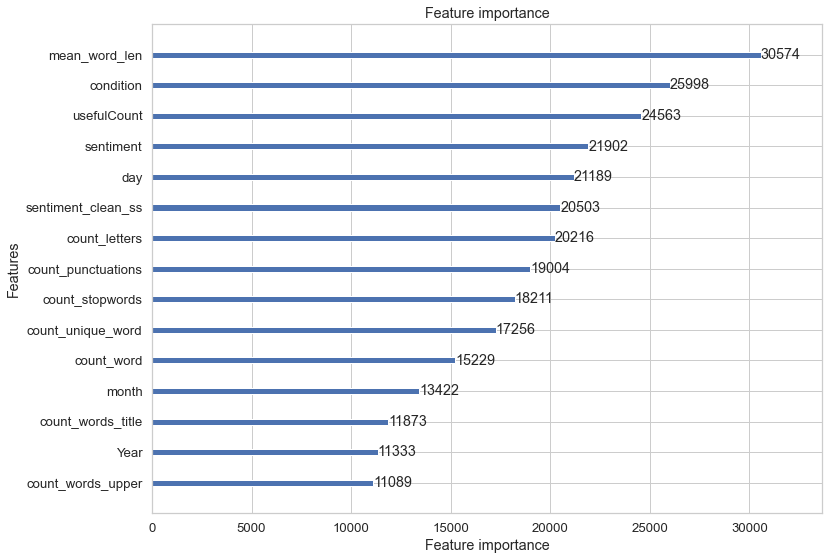

In [44]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.2)
plot_importance(model);

 * **Above figure depicts the feature importance plot using the LightGBM. It can be inferred that the most importance feature is the mean word length and after that the condition of the patient. The least important feature of them all is the upper-case word count.**

### XGBClassifier

In [45]:
# Training Model - II

xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30,
                    eval_metric='logloss')

model_xgb = xgb_clf.fit(X_train, y_train)

# Predictions
predictions_2 = model_xgb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_2), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_2), '\n')

print (classification_report(y_test, predictions_2))

[12:37:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


The Accuracy of the model is :  0.7952182790168483 

The confusion Matrix is 

[[ 5511 10563]
 [ 2576 45511]] 

              precision    recall  f1-score   support

         0.0       0.68      0.34      0.46     16074
         1.0       0.81      0.95      0.87     48087

    accuracy                           0.80     64161
   macro avg       0.75      0.64      0.67     64161
weighted avg       0.78      0.80      0.77     64161



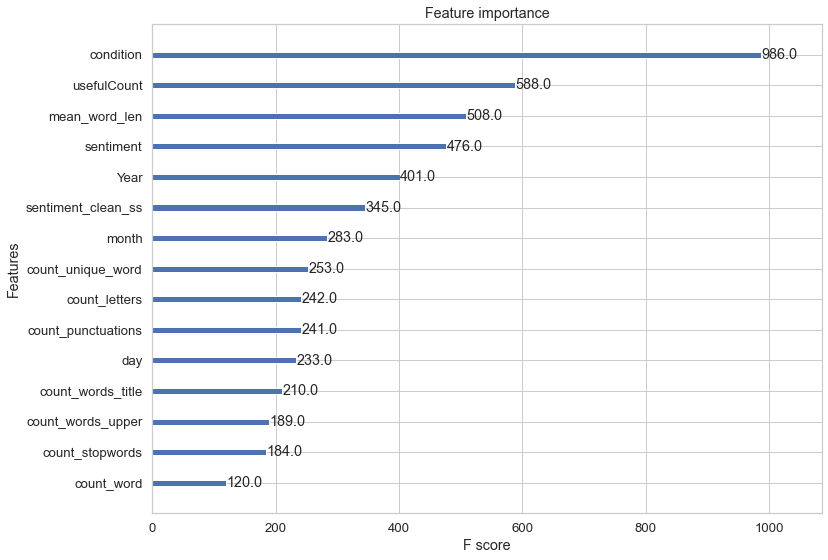

In [46]:
# Feature Importance Plot using XGBClassifier
from xgboost import plot_importance # plot_importance for xgboost
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(model_xgb);

### CatBoostClassifier

In [47]:
# Training Model - III
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(iterations = 10000,
                            learning_rate = 0.5);

model_cat = cat_clf.fit(X_train, y_train);

0:	learn: 0.5251325	total: 306ms	remaining: 50m 55s
1:	learn: 0.4884107	total: 328ms	remaining: 27m 19s
2:	learn: 0.4760385	total: 351ms	remaining: 19m 29s
3:	learn: 0.4705362	total: 377ms	remaining: 15m 42s
4:	learn: 0.4678222	total: 402ms	remaining: 13m 22s
5:	learn: 0.4649206	total: 431ms	remaining: 11m 57s
6:	learn: 0.4633966	total: 453ms	remaining: 10m 46s
7:	learn: 0.4618849	total: 475ms	remaining: 9m 52s
8:	learn: 0.4606682	total: 503ms	remaining: 9m 18s
9:	learn: 0.4598819	total: 524ms	remaining: 8m 43s
10:	learn: 0.4586713	total: 547ms	remaining: 8m 16s
11:	learn: 0.4577515	total: 582ms	remaining: 8m 4s
12:	learn: 0.4567747	total: 606ms	remaining: 7m 45s
13:	learn: 0.4563275	total: 634ms	remaining: 7m 32s
14:	learn: 0.4556019	total: 660ms	remaining: 7m 19s
15:	learn: 0.4542206	total: 684ms	remaining: 7m 6s
16:	learn: 0.4537799	total: 714ms	remaining: 6m 59s
17:	learn: 0.4533286	total: 738ms	remaining: 6m 49s
18:	learn: 0.4528528	total: 765ms	remaining: 6m 41s
19:	learn: 0.4523

In [48]:
# Predictions
predictions_3 = model_cat.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_3), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_3), '\n')

print (classification_report(y_test, predictions_3))

The Accuracy of the model is :  0.8954816789015134 

The confusion Matrix is 

[[11914  4160]
 [ 2546 45541]] 

              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78     16074
         1.0       0.92      0.95      0.93     48087

    accuracy                           0.90     64161
   macro avg       0.87      0.84      0.86     64161
weighted avg       0.89      0.90      0.89     64161



**In the Machine Learning modelling, three classification models were trained which were LightGBM, XGBoost, and the Cat Boost.
The best performing model is the LGBM Classifier with 90.14%**